Current Progress: 100.0 %
5.0
2.0
26.0
3.0
The old training dataframe shape: (2794, 11)


C:\Users\tmccl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total number of outliers identified is:  140
The new training dataframe shape: (2654, 11)
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'bootstrap': False, 'max_features': 'sqrt', 'random_state': 10}
0.9360257175251139


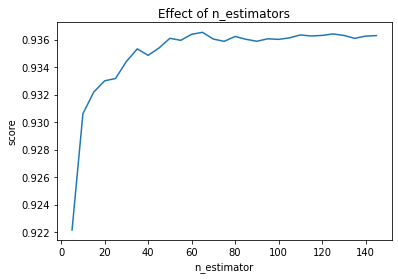

0.934862682126357


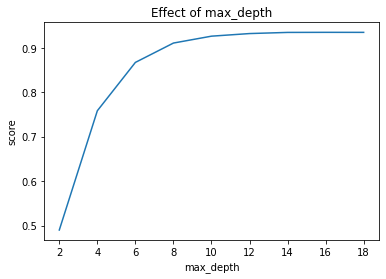

0.9350208592357114


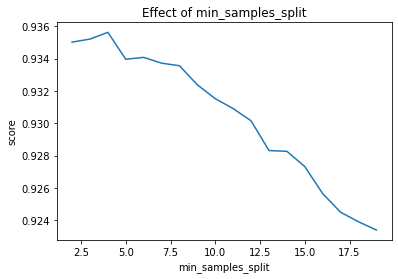

0.9315204387491216


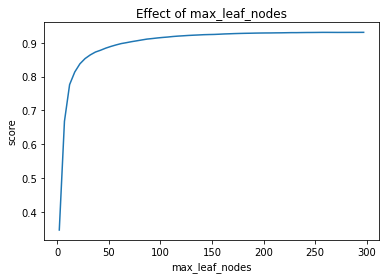

0.9251024881229055


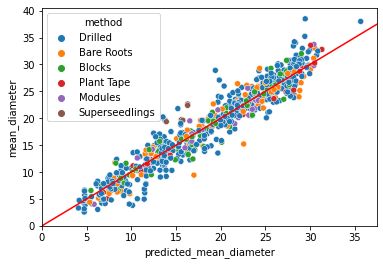

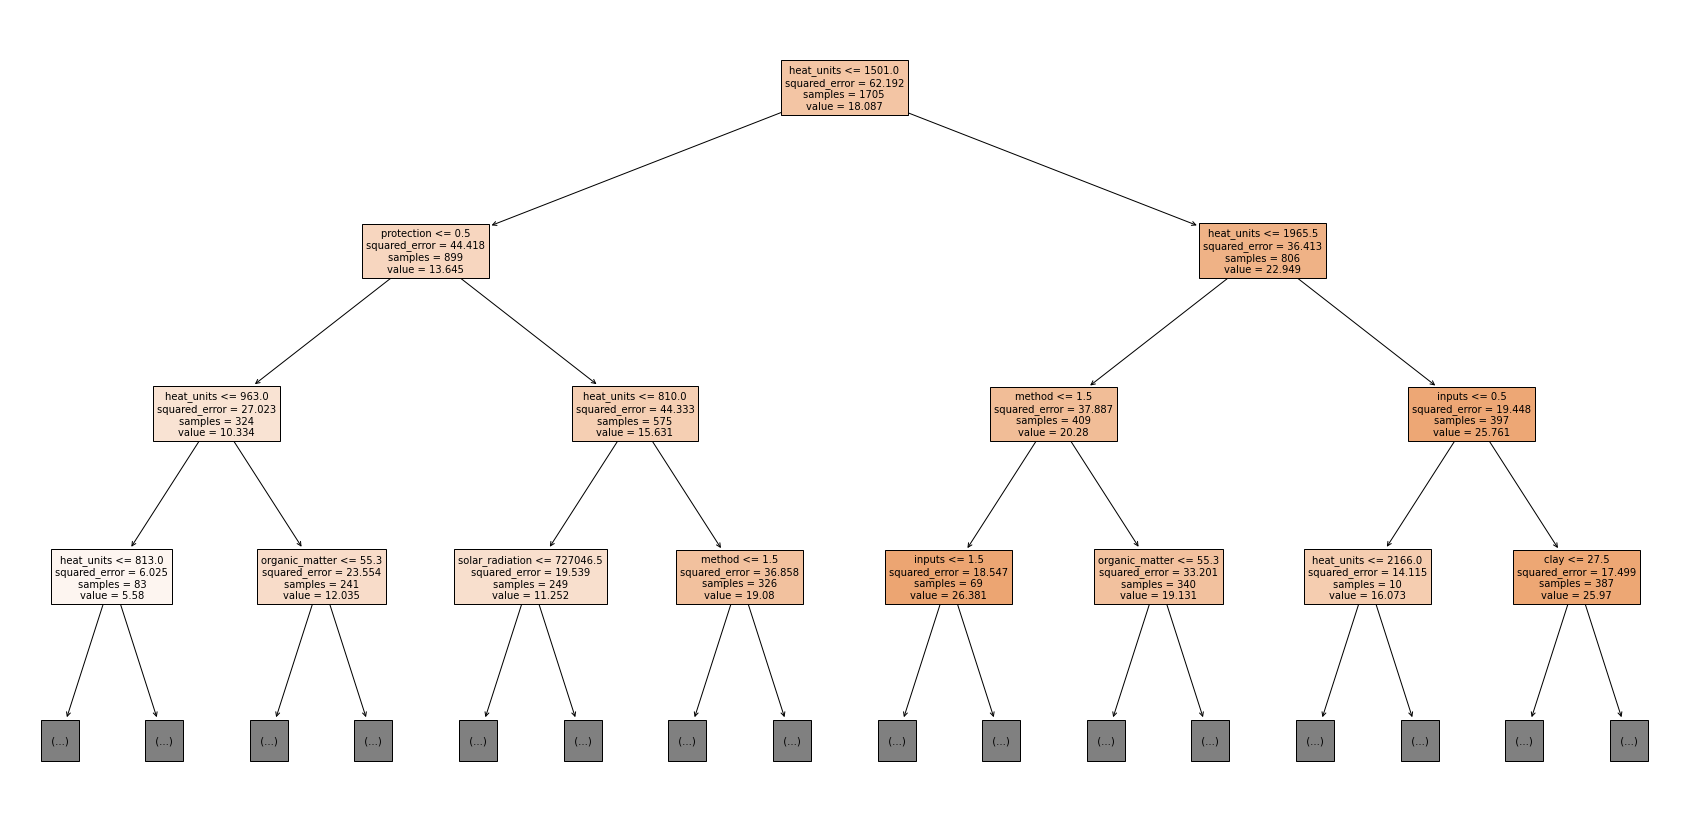

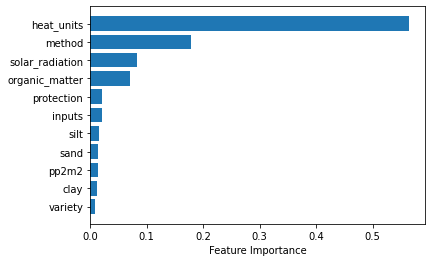

In [1]:
# Run preprocessing script to make dataframe objects available.

%run RFRegressionEval.ipynb

In [6]:
indicator_variables_list = ['pp2m2','heat_units','solar_radiation','organic_matter','sand','silt','clay','method','variety','inputs','protection']

zone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   field                      755 non-null    object        
 1   zone                       755 non-null    int32         
 2   planting_date              755 non-null    datetime64[ns]
 3   variety                    755 non-null    object        
 4   method                     755 non-null    object        
 5   inputs                     755 non-null    object        
 6   protection                 755 non-null    object        
 7   planting_rate              755 non-null    int64         
 8   sand                       755 non-null    int64         
 9   silt                       755 non-null    int64         
 10  clay                       755 non-null    int64         
 11  organic_matter             755 non-null    float64       
 12  harvest_

In [7]:
planting_data = zone_data.copy()[['fieldvariety',
                                  'variety',
                                  'method',
                                  'inputs',
                                  'protection',
                                  'sand',
                                  'silt',
                                  'clay',
                                  'organic_matter',
                                  'mean_pp2m2',
                                  'max_heat',
                                  'max_solar',
                                  'remaining_heat',
                                  'remaining_solar',
                                  ]].loc[(zone_data['planting_date'] > season)]

planting_data['heat_units'] = planting_data['max_heat'] + planting_data['remaining_heat']
planting_data['solar_radiation'] = planting_data['max_solar'] + planting_data['remaining_solar']

planting_data = planting_data.groupby(['fieldvariety']).agg({'method' : ['first'],
                                                             'inputs' : ['first'],
                                                             'variety' : ['first'],
                                                             'protection' : ['first'],
                                                             'sand' : ['mean'],
                                                             'silt' : ['mean'],
                                                             'clay' : ['mean'],
                                                             'organic_matter' : ['mean'],
                                                             'mean_pp2m2' : ['mean'],
                                                             'heat_units' : ['mean'],
                                                             'solar_radiation' : ['mean']}).reset_index()

planting_data.columns = ['fieldvariety',
                         'method',
                         'inputs',
                         'variety',
                         'protection',
                         'sand',
                         'silt',
                         'clay',
                         'organic_matter',
                         'pp2m2',
                         'heat_units',
                         'solar_radiation']



In [8]:
print(planting_data.shape)
planting_data

(101, 12)


,fieldvariety,method,inputs,variety,protection,sand,silt,clay,organic_matter,pp2m2,heat_units,solar_radiation
0,Allans 06 - Krypton,Drilled,Conventional,Krypton,Barley,40.000000,41.000000,19.000000,24.600000,40.000000,2360.500000,1.657460e+06
1,Allans 08/09 - Chiefton,Drilled,Conventional,Chiefton,Barley,39.000000,43.000000,18.000000,17.000000,35.166667,2419.185000,1.645863e+06
2,Allans 11 - Batter,Drilled,Conventional,Batter,Barley,36.000000,44.000000,20.000000,18.300000,42.583333,2489.135000,1.694038e+06
3,Buckenham Heap - Chiefton,Drilled,Conventional,Chiefton,Barley,76.000000,8.000000,16.000000,10.200000,34.250000,2238.762500,1.464301e+06
4,Buckenham Long Narrow - Chiefton,Drilled,Conventional,Chiefton,Barley,73.000000,15.000000,12.000000,13.700000,33.250000,2225.133333,1.451528e+06
5,Buckenham Stadium Field - Chiefton,Drilled,Conventional,Chiefton,Barley,69.000000,19.000000,12.000000,14.800000,31.450000,2222.000000,1.457486e+06
6,Chatteris Farms 39 - Laston,Plant Tape,Conventional,Laston,None,39.000000,41.000000,20.000000,11.800000,29.933333,1923.924405,1.069522e+06
7,Chatteris Farms 39 - Pluston,Plant Tape,Conventional,Pluston,None,39.000000,41.000000,20.000000,11.800000,30.266667,1934.924405,1.071728e+06
8,Garretts Listers 11 - Comanche,Drilled,Conventional,Comanche,Barley,9.000000,66.000000,25.000000,41.700000,44.400000,1966.370833,1.606978e+06
9,Garretts Listers 12 - Comanche,Drilled,Conventional,Comanche,Barley,18.000000,59.000000,23.000000,70.300000,44.500000,2058.908333,1.651174e+06


In [9]:
indicator_data = planting_data.reindex(columns=indicator_variables_list)
                                      
indicator_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pp2m2            101 non-null    float64
 1   heat_units       101 non-null    float64
 2   solar_radiation  101 non-null    float64
 3   organic_matter   101 non-null    float64
 4   sand             101 non-null    float64
 5   silt             101 non-null    float64
 6   clay             101 non-null    float64
 7   method           101 non-null    object 
 8   variety          101 non-null    object 
 9   inputs           101 non-null    object 
 10  protection       101 non-null    object 
dtypes: float64(7), object(4)
memory usage: 8.8+ KB


In [10]:
# Encode categoriccal variables that will be used as predictors

pd.options.mode.chained_assignment = None  # default='warn'

encoded_array = enc.transform(indicator_data[['method', 'variety', 'inputs', 'protection']])
indicator_data.loc[:, ['method', 'variety', 'inputs', 'protection']] = encoded_array.copy()

indicator_data.head()

,pp2m2,heat_units,solar_radiation,organic_matter,sand,silt,clay,method,variety,inputs,protection
0,40.000000,2360.500000,1.657460e+06,24.6,40.0,41.0,19.0,2.0,11.0,1.0,0.0
1,35.166667,2419.185000,1.645863e+06,17.0,39.0,43.0,18.0,2.0,4.0,1.0,0.0
2,42.583333,2489.135000,1.694038e+06,18.3,36.0,44.0,20.0,2.0,2.0,1.0,0.0
3,34.250000,2238.762500,1.464301e+06,10.2,76.0,8.0,16.0,2.0,4.0,1.0,0.0
4,33.250000,2225.133333,1.451528e+06,13.7,73.0,15.0,12.0,2.0,4.0,1.0,0.0


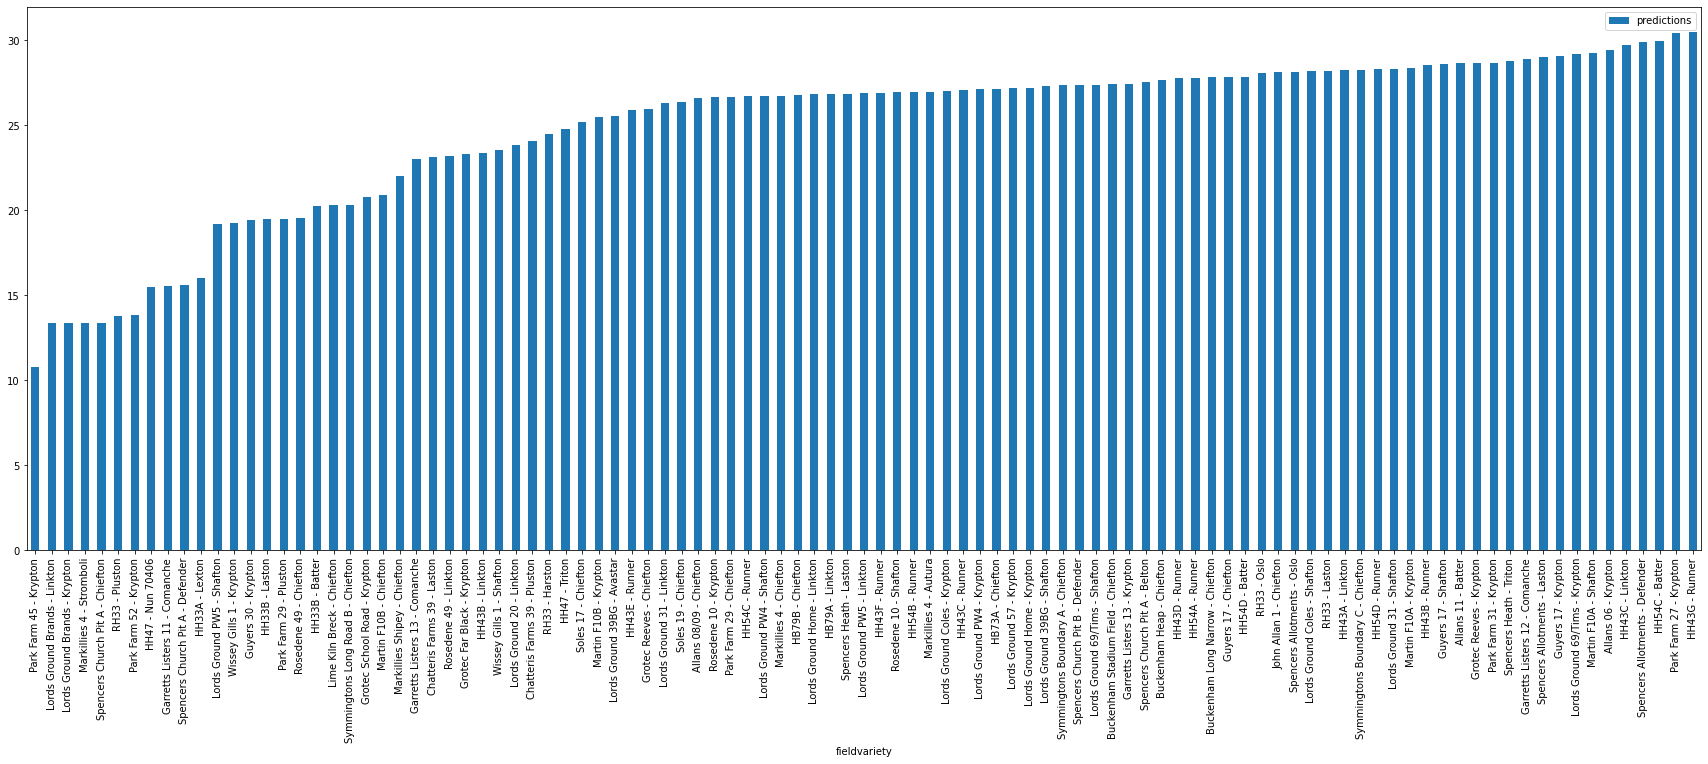

In [24]:
rfr_preds = rfr.predict(indicator_data)

planting_data['predictions'] = rfr_preds
planting_data= planting_data.sort_values(by=['predictions'])

planting_data.plot(x='fieldvariety', y='predictions', kind='bar', figsize=(30,10))
plt.savefig('Predictions.png', dpi=300, bbox_inches = 'tight')